# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)


            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [ ]:
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

# Generar datos aleatorios para la puerta AND
X_data = np.random.randint(0, 2, size=(N_samples, N_inputs))
Y_data = np.prod(X_data, axis=1)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train = X_data[:int(N_samples * train_size)]
Y_train = Y_data[:int(N_samples * train_size)]

X_validation = X_data[int(N_samples * train_size):]
Y_validation = Y_data[int(N_samples * train_size):]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 1]]
Y_data (first 5 samples):
[0 0 1 0 0]


In [ ]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.037356052931013926 | val error: 0.010167559109790308
epoch: 10 | train error: 0.0006086052459004025 | val error: 0.0005871540373234594
epoch: 20 | train error: 0.0002895799374990915 | val error: 0.0002884451721126257
epoch: 30 | train error: 0.00018821596425167133 | val error: 0.00018961642534523785
epoch: 40 | train error: 0.00013890983650563299 | val error: 0.00014076073421408967
epoch: 50 | train error: 0.00010987125713520394 | val error: 0.00011173083348570483
epoch: 60 | train error: 9.077573394128834e-05 | val error: 9.253287160982852e-05
epoch: 70 | train error: 7.728078257134227e-05 | val error: 7.891224180562741e-05
epoch: 80 | train error: 6.724641500833365e-05 | val error: 6.875518868679484e-05
epoch: 90 | train error: 5.949756555362384e-05 | val error: 6.089423940916607e-05


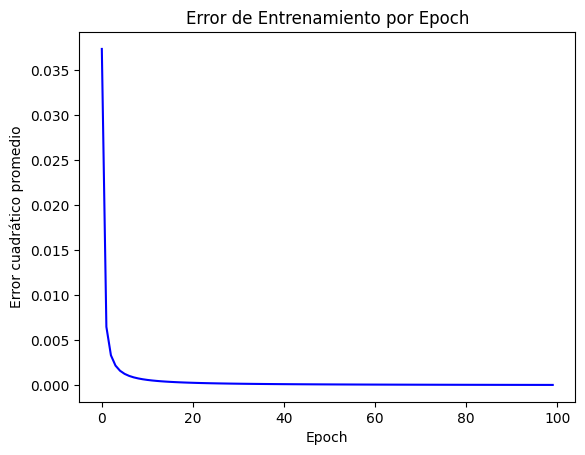

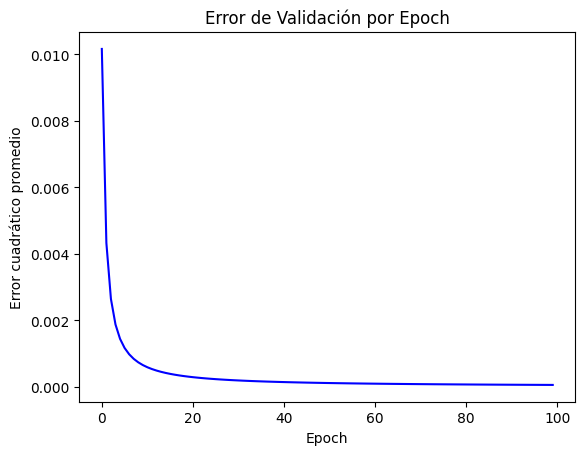

In [ ]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [ ]:
# Obtener las métricas de test del modelo

X_test = np.random.randint(0,2,size=(500, N_inputs))
Y_test = np.prod(X_test, axis=1)
## generar las predicciones
predictions = np.array([perceptron_and.predict(x) for x in X_test])

## Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predictions.round())

## Visualiza la matriz de confusión
print("Matriz")
print(conf_matrix)

Matriz
[[372   0]
 [  0 128]]
